Mounting Drive

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%pwd

'/content'

In [3]:
%cd /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Traffic Sign Detection

/content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Traffic Sign Detection


Environment

In [4]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


Test - CLI

In [6]:
!yolo detect predict model=yolov8l.pt source="inference/people.jpg"

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l summary (fused): 268 layers, 43668288 parameters, 0 gradients, 165.2 GFLOPs

image 1/1 /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Traffic Sign Detection/inference/people.jpg: 480x640 5 persons, 1 bench, 1 wine glass, 1 cup, 3 chairs, 2 potted plants, 1 vase, 115.3ms
Speed: 4.3ms preprocess, 115.3ms inference, 116.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


[INFO] - 1:  (2591, 3600, 3)
[INFO] - 2:  (460, 640, 3)


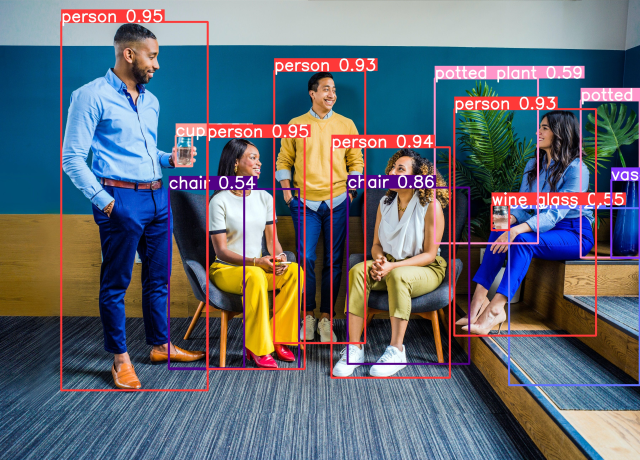

In [7]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

path = "runs/detect/predict/people.jpg"
img = cv2.imread(path)
print("[INFO] - 1: ",img.shape)

img = imutils.resize(img, width=640)
print("[INFO] - 2: ",img.shape)

cv2_imshow(img)

Test - Python Implementation

In [ ]:
# # # # # # # # # # # # # # # #
# 1. Library
# 2. Image & Model
# 3. Prediction & Score
# 4. Show Result
# # # # # # # # # # # # # # # #


0: 480x640 5 persons, 1 wine glass, 1 cup, 3 chairs, 2 potted plants, 1 vase, 52.1ms
Speed: 1.4ms preprocess, 52.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


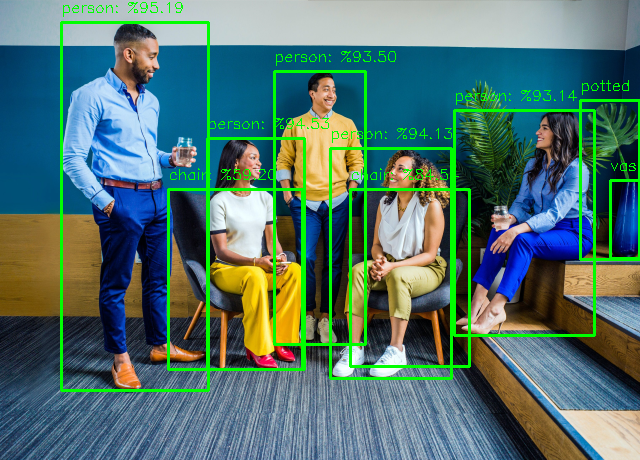

In [4]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_SIMPLEX

img_path = "inference/people.jpg"
model_path = "yolov8l.pt"

img = cv2.imread(img_path)
img = imutils.resize(img, width=640)

model = YOLO(model_path)

results = model(img)[0]

for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result
  x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
  if score > 0.5:
    cv2.rectangle(img, (x1, y1), (x2,y2), (0,255,0), 2)

    score = score * 100
    class_name = results.names[class_id]

    text = f"{class_name}: %{score:.2f}"
    cv2.putText(img, text, (x1, y1-10), font, 0.5, (0,255,0), 1)

cv2_imshow(img) # PC: cv2.imshow("Prediction", img)

Training

In [5]:
!unzip data/traffic_sign_dataset.zip -d ./data

Archive:  data/traffic_sign_dataset.zip
 extracting: ./data/README.dataset.txt  
 extracting: ./data/README.roboflow.txt  
 extracting: ./data/data.yaml        
   creating: ./data/test/
   creating: ./data/test/images/
 extracting: ./data/test/images/3F523966-23D2-4F56-A0FB-E14C0D9253E3-9302-000007468771F4A5_jpg.rf.287ec60763bcaa7e12ca3e942dce4efc.jpg  
 extracting: ./data/test/images/Control_jpg.rf.3c9dceaa546aeef3ae54e1e11c0d8226.jpg  
 extracting: ./data/test/images/IMG_2433_jpg.rf.5f70e2d4add6e5132791516b411ee576.jpg  
 extracting: ./data/test/images/IMG_2498_jpg.rf.538c880be1eae9a7892166f1ed3c82dc.jpg  
 extracting: ./data/test/images/IMG_2613_jpg.rf.236445d58691946e007e802fe9eef241.jpg  
 extracting: ./data/test/images/IMG_2616-2_jpg.rf.68666dfc343606b2639ca40a97ad0630.jpg  
 extracting: ./data/test/images/IMG_2629_jpg.rf.feebbd6c731d26130e9d7fe4e2f9774b.jpg  
 extracting: ./data/test/images/IMG_2635_jpg.rf.2367f94313833344c924a9a925894677.jpg  
 extracting: ./data/test/images/I

In [6]:
!yolo detect train model=yolov8l.pt data=data/data.yaml imgsz=640 workers=8 batch=8 device=0 epochs=50 name=yolov8_traffic_sign

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=data/data.yaml, epochs=50, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_traffic_sign, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimi

In [ ]:
!yolo detect train model=runs/detect/yolov8_traffic_sign/weights/last.pt resume=True

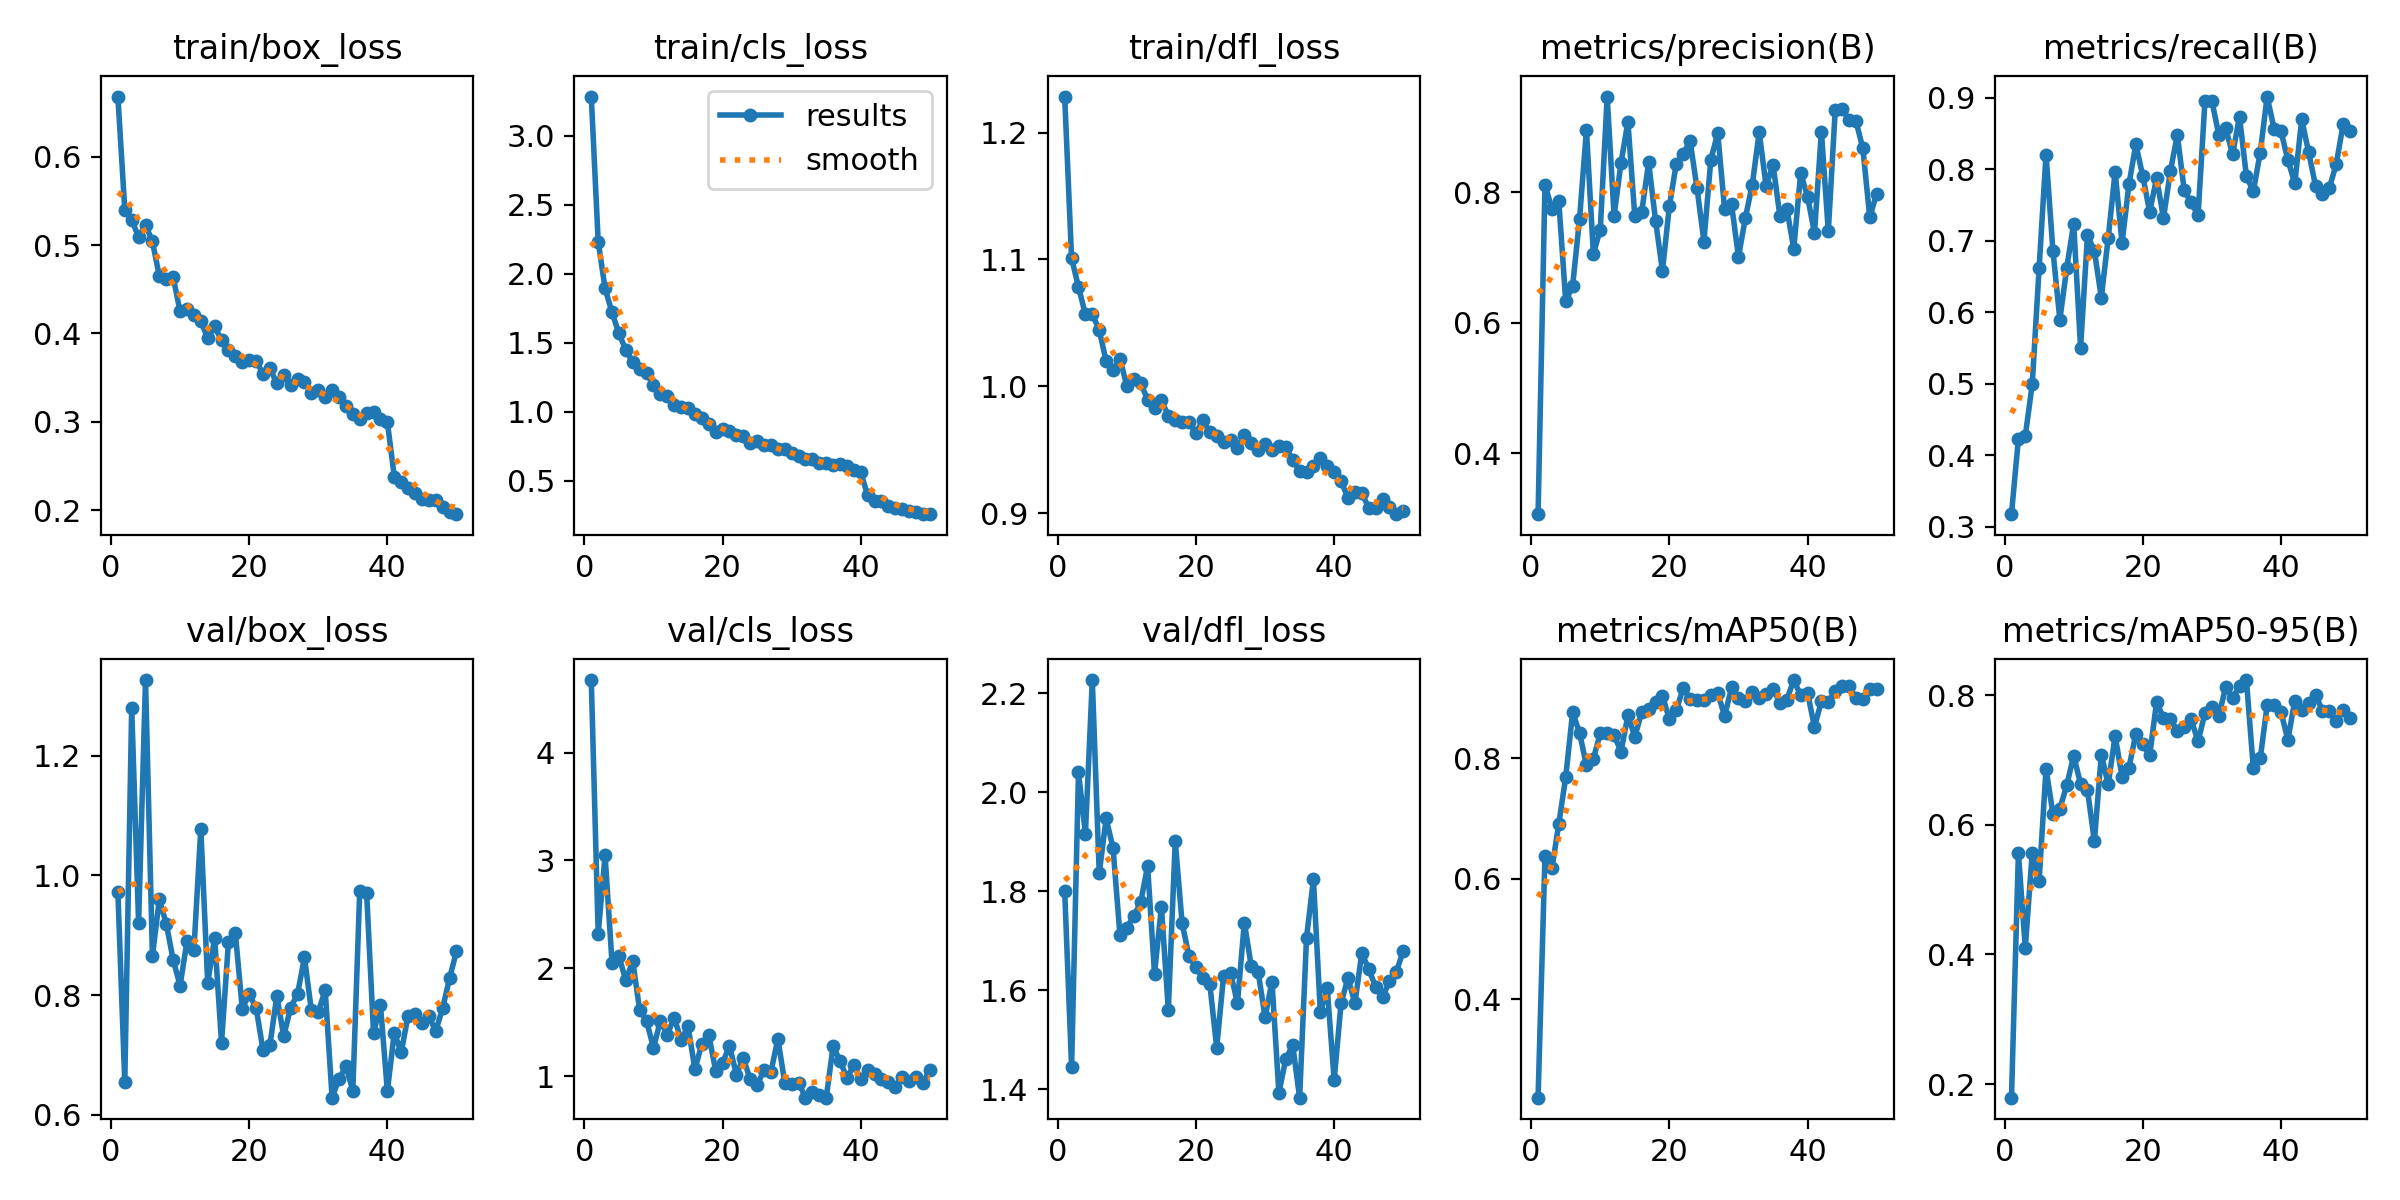

In [5]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "runs/detect/yolov8_traffic_sign/results.png"
img = cv2.imread(img_path)

cv2_imshow(img)

Prediction - CLI

In [6]:
!yolo detect predict model="runs/detect/yolov8_traffic_sign/weights/best.pt" source= "inference/stop_sign.jpg"

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43635135 parameters, 0 gradients, 165.0 GFLOPs

image 1/1 /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Traffic Sign Detection/inference/stop_sign.jpg: 640x608 1 Stop 2, 106.0ms
Speed: 12.7ms preprocess, 106.0ms inference, 311.1ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


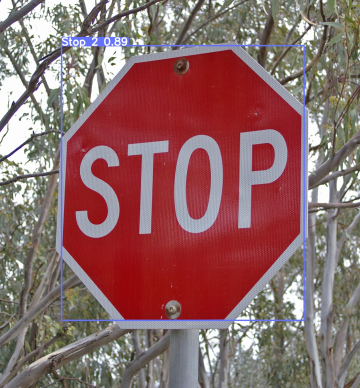

In [9]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "runs/detect/predict2/stop_sign.jpg"
img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

cv2_imshow(img)

Error // Limitations

In [10]:
!yolo detect predict model="runs/detect/yolov8_traffic_sign/weights/best.pt" source= "https://www.puertoricocartransport.com/news/wp-content/uploads/2021/08/u-turn-puerto-rico.jpg"

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43635135 parameters, 0 gradients, 165.0 GFLOPs

100% 278k/278k [00:00<00:00, 3.85MB/s]
image 1/1 /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Traffic Sign Detection/u-turn-puerto-rico.jpg: 448x640 (no detections), 103.8ms
Speed: 2.0ms preprocess, 103.8ms inference, 18.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


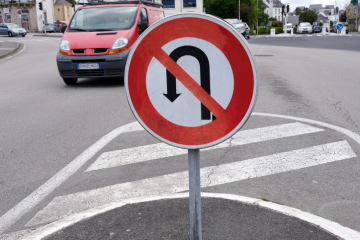

In [11]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "runs/detect/predict3/u-turn-puerto-rico.jpg"
img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

cv2_imshow(img)

In [13]:
!yolo detect predict model="runs/detect/yolov8_traffic_sign/weights/best.pt" source= "https://www.shutterstock.com/shutterstock/photos/284713436/display_1500/stock-photo-traffic-triangle-shaped-right-u-turn-sign-with-post-on-white-background-284713436.jpg"

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43635135 parameters, 0 gradients, 165.0 GFLOPs

100% 263k/263k [00:00<00:00, 5.94MB/s]
image 1/1 /content/gdrive/MyDrive/YOLOv8 Projects/Self Driving Car Project/Traffic Sign Detection/stock-photo-traffic-triangle-shaped-right-u-turn-sign-with-post-on-white-background-284713436.jpg: 640x608 2 Cross Roadss, 1 No Parking, 101.3ms
Speed: 4.6ms preprocess, 101.3ms inference, 87.5ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


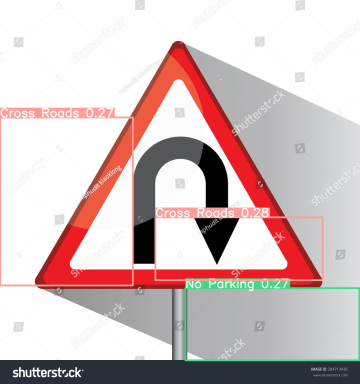

In [14]:
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = "runs/detect/predict5/stock-photo-traffic-triangle-shaped-right-u-turn-sign-with-post-on-white-background-284713436.jpg"
img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

cv2_imshow(img)

Prediction - Python Implementation


0: 640x608 1 Stop 2, 66.4ms
Speed: 2.4ms preprocess, 66.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


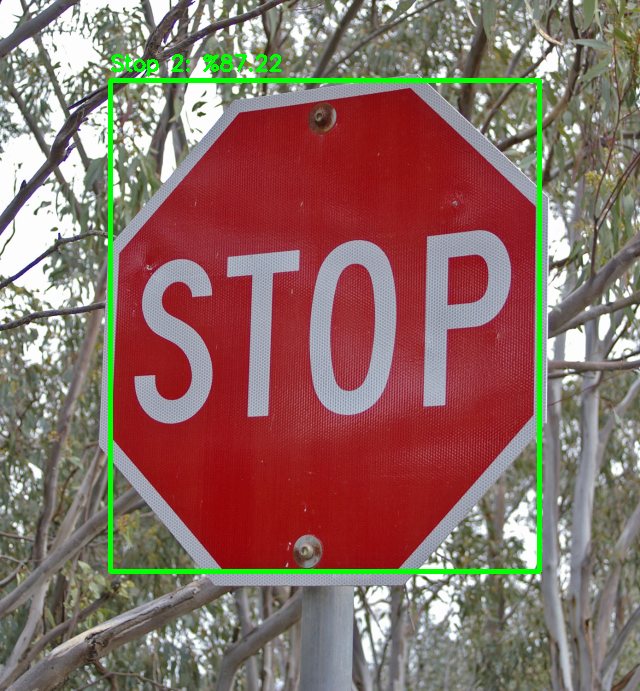

In [20]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_SIMPLEX

img_path = "inference/stop_sign.jpg"
model_path = "runs/detect/yolov8_traffic_sign/weights/best.pt"

img = cv2.imread(img_path)
img = imutils.resize(img, width=640)

model = YOLO(model_path)

results = model(img)[0]

for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result
  x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
  if score > 0.5:
    cv2.rectangle(img, (x1, y1), (x2,y2), (0,255,0), 4)

    score = score * 100
    class_name = results.names[class_id]

    text = f"{class_name}: %{score:.2f}"
    cv2.putText(img, text, (x1, y1-10), font, 0.7, (0,255,0), 2)

cv2_imshow(img) # PC: cv2.imshow("Prediction", img)